In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json
from statannotations.Annotator import Annotator #!pip install seaborn statannotations 
import pickle

### Load data for the plots

In [2]:
pcons_res=pd.read_csv('data_plots/pconsc_data.csv')
esm_res=pd.read_csv('data_plots/esm_data.csv')
alpha_res=pd.read_csv('data_plots/alpha_data.csv')
random_res=pd.read_csv('data_plots/random_data.csv')
rand_mol_res=pd.read_csv('data_plots/random_mol_data.csv')
pcons_res_mol=pd.read_csv('data_plots/original_mol_data.csv')
vertical_stack1 = pd.concat([pcons_res, esm_res,alpha_res,random_res], axis=0)
df_melted1 = pd.melt(vertical_stack1, id_vars=["cmap"], value_vars=["CI", "Pearson",'RMSE','Spearman'])
rand_mol_res=pd.read_csv('data_plots/random_mol_data.csv')
pcons_res_mol=pd.read_csv('data_plots/original_mol_data.csv')
vertical_stack2 = pd.concat([pcons_res_mol, rand_mol_res], axis=0)
df_melted2 = pd.melt(vertical_stack2, id_vars=["cmap"], value_vars=["CI", "Pearson",'RMSE','Spearman'])

In [3]:
only_lig=pd.read_csv('data_plots/only_ligand_data_kiba.csv')
only_lig['cmap']='Only Ligand enc'
only_lig

,CI,Pearson,RMSE,Spearman,cmap
0,0.699455,0.589293,0.646484,0.511923,Only Ligand enc
1,0.690449,0.562114,0.673064,0.496228,Only Ligand enc
2,0.709369,0.630798,0.655353,0.534532,Only Ligand enc
3,0.711560,0.620690,0.679896,0.545914,Only Ligand enc
4,0.710209,0.557796,0.629630,0.520762,Only Ligand enc
5,0.691235,0.646852,0.648931,0.516288,Only Ligand enc
6,0.703369,0.611112,0.651745,0.517876,Only Ligand enc
7,0.703617,0.591432,0.648180,0.500144,Only Ligand enc
8,0.675532,0.548810,0.667884,0.449970,Only Ligand enc
9,0.678548,0.595630,0.643701,0.486755,Only Ligand enc


In [4]:
pcons_res_mol1=pcons_res_mol
pcons_res_mol1['cmap']='Ligand+protein enc'


In [5]:
rand_mol_res1=rand_mol_res
rand_mol_res1['cmap']='Random Ligand+protein enc'

In [6]:
vertical_stack6 = pd.concat([pcons_res_mol1,rand_mol_res1, only_lig], axis=0)
df_melted6 = pd.melt(vertical_stack6, id_vars=["cmap"], value_vars=["CI", "Pearson",'RMSE','Spearman'])

In [7]:
pcons_res

,CI,Pearson,RMSE,Spearman,cmap
0,0.836616,0.780921,0.497579,0.800984,Pconsc4
1,0.842262,0.809381,0.499085,0.818261,Pconsc4
2,0.855547,0.818042,0.455887,0.824221,Pconsc4
3,0.854010,0.819140,0.494077,0.821747,Pconsc4
4,0.864884,0.846482,0.439987,0.843546,Pconsc4
5,0.840821,0.777199,0.497723,0.796605,Pconsc4
6,0.855628,0.833973,0.447734,0.830768,Pconsc4
7,0.850695,0.834527,0.458980,0.812848,Pconsc4
8,0.856649,0.844047,0.441942,0.830297,Pconsc4
9,0.837040,0.795681,0.463917,0.799880,Pconsc4


In [8]:
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

In [9]:
sns.set(font_scale = 3,style="white")

### Boxplot- comparision of protein encodings from various contact map techniques

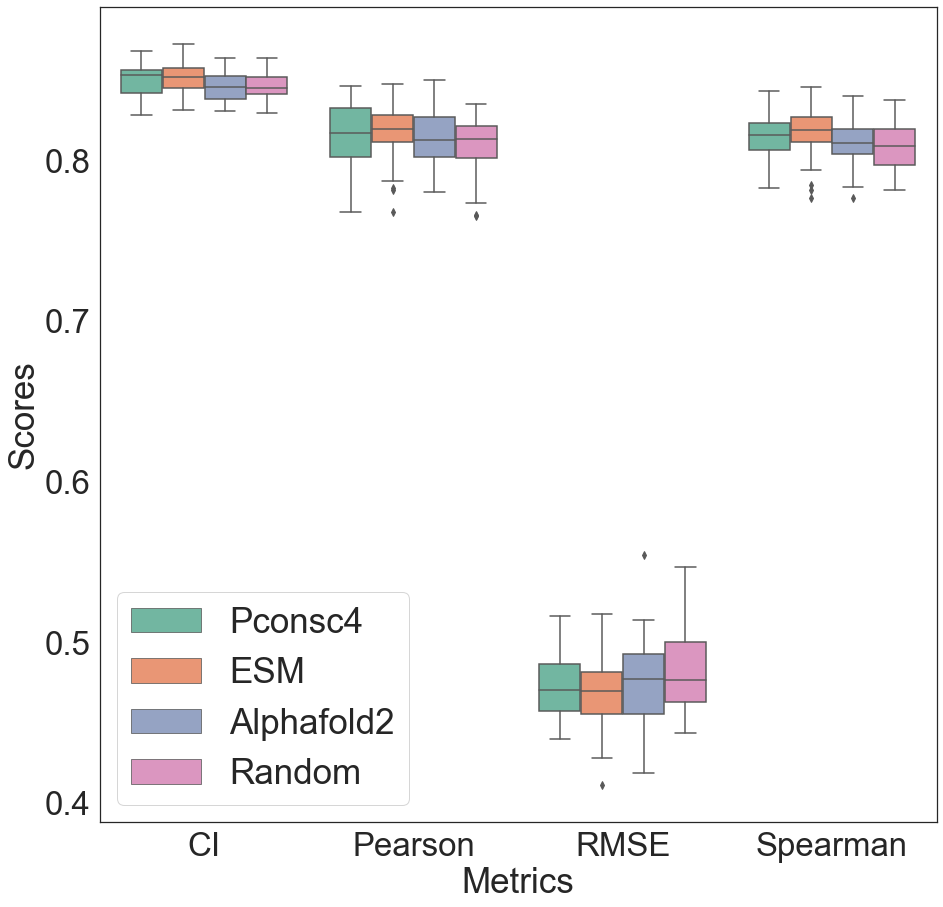

In [10]:
fig = plt.figure(figsize=(15, 15))

adjust_box_widths(fig, 1.2)
hue_order=['Pconsc4','ESM','Alphafold2','Random']
order = ["CI", "Pearson",'RMSE','Spearman']

ax =  sns.boxplot(x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)

ax.set_xlabel('Metrics',fontsize=35)
ax.set_ylabel('Scores',fontsize=35)

plt.legend(loc='lower left',fontsize=35)

# fig.savefig(os.path.join('results_plots',  'boxplot_proteins' + '.png'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_plots',  'boxplot_proteins' + '.pdf'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_plots',  'boxplot_proteins' + '.svg'), dpi=500, bbox_inches='tight')


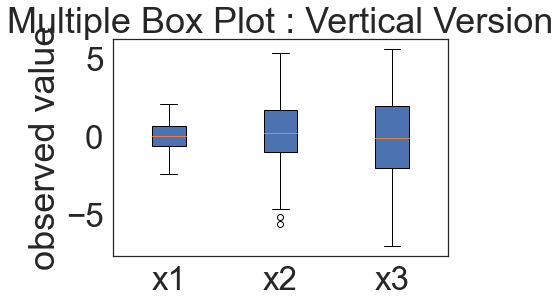

Text(0.5, 1.0, 'Multiple Box Plot : Horizontal Version')

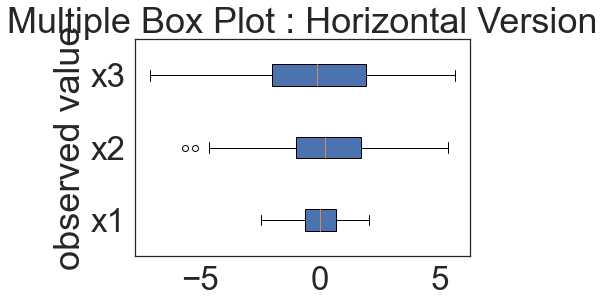

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(562201)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

#MultipleBoxplot
plt.boxplot(all_data, vert=True, patch_artist=True, labels=labels) 
plt.ylabel('observed value')
plt.title('Multiple Box Plot : Vertical Version')
plt.show()

plt.boxplot(all_data, vert=False, patch_artist=True, labels=labels) 
plt.ylabel('observed value')
plt.title('Multiple Box Plot : Horizontal Version')  

### Boxplot- comparision of ligand encodings 

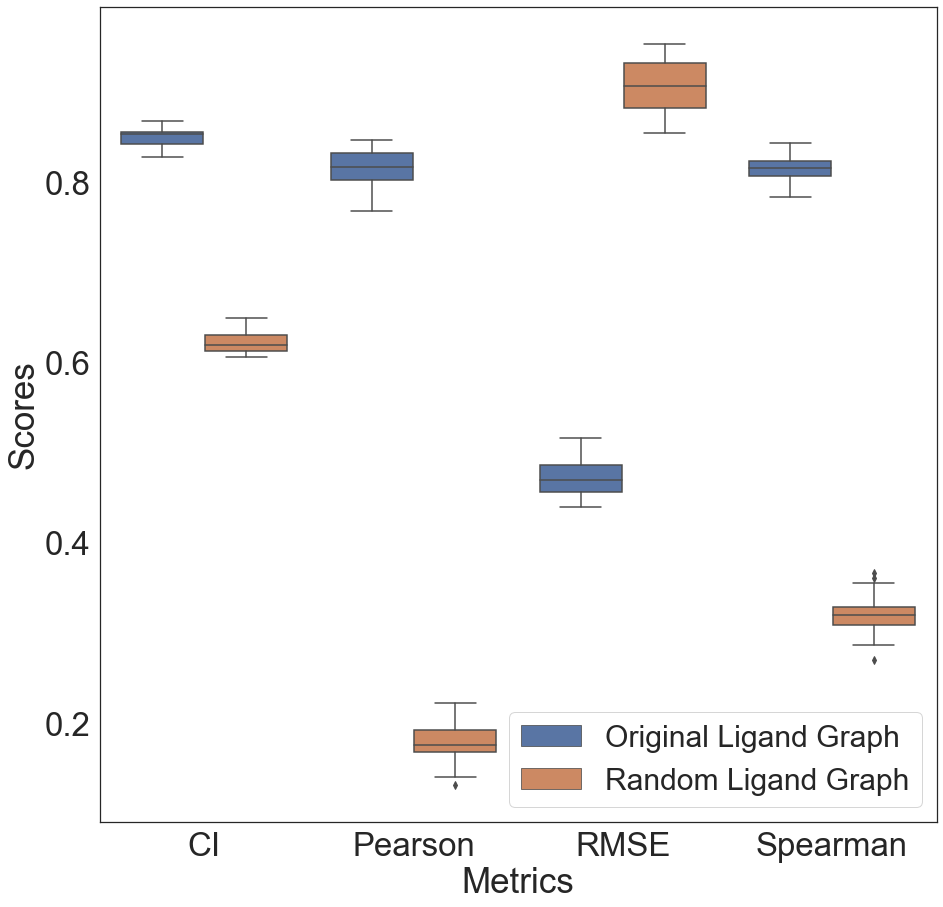

In [16]:
fig = plt.figure(figsize=(15, 15))

adjust_box_widths(fig, 1.2)
hue_order=['Original Ligand Graph','Random Ligand Graph']
order = ["CI", "Pearson",'RMSE','Spearman']

ax =  sns.boxplot(x='variable', y='value',hue='cmap', data=df_melted2, order=order,  hue_order=hue_order)

ax.set_xlabel('Metrics',fontsize=35)
ax.set_ylabel('Scores',fontsize=35)

plt.legend(loc='lower right',fontsize=30)

fig.savefig(os.path.join('results_plots',  'boxplot_ligands' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'boxplot_ligands' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'boxplot_ligands' + '.svg'), dpi=500, bbox_inches='tight')

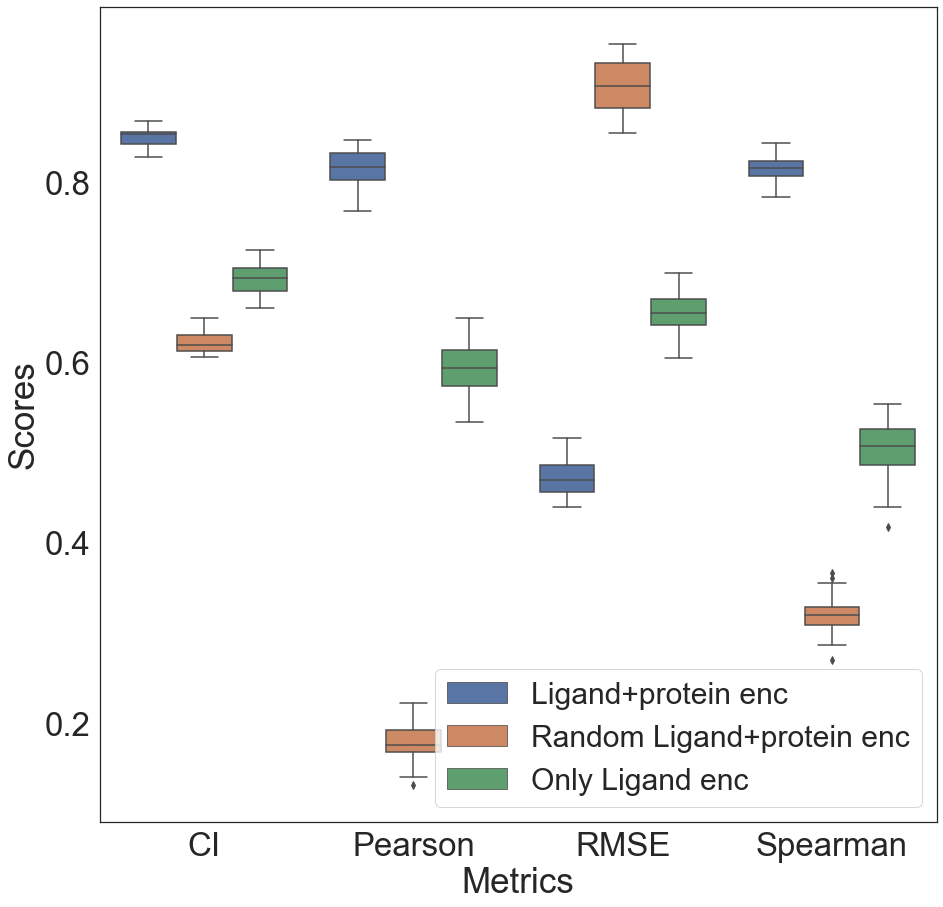

In [23]:
fig = plt.figure(figsize=(15, 15))

adjust_box_widths(fig, 1.2)
hue_order=['Ligand+protein enc','Random Ligand+protein enc', 'Only Ligand enc']
order = ["CI", "Pearson",'RMSE','Spearman']

ax =  sns.boxplot(x='variable', y='value',hue='cmap', data=df_melted6, order=order,  hue_order=hue_order)

ax.set_xlabel('Metrics',fontsize=35)
ax.set_ylabel('Scores',fontsize=35)

plt.legend(loc='lower right',fontsize=30)

fig.savefig(os.path.join('results_plots',  'boxplot_ligands_only' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'boxplot_ligands_only' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'boxplot_ligands_only' + '.svg'), dpi=500, bbox_inches='tight')

In [13]:
def plot_boxplots(datasets, colours, groups, ax, title):
    # Get the max of the dataset
    all_maximums = [d.max(axis=1).values for d in datasets]
    dataset_maximums = [max(m) for m in all_maximums]
    y_max = max(dataset_maximums)
    # Get the min of the dataset
    all_minimums = [d.min(axis=1).values for d in datasets]
    dataset_minimums = [min(m) for m in all_minimums]
    y_min = min(dataset_minimums)
    # Calculate the y-axis range
    y_range = y_max - y_min

    # Set x-positions for boxes
    x_pos_range = np.arange(len(datasets)) / (len(datasets) - 1)
    x_pos = (x_pos_range * 0.5) + 0.75
    # Create the plot
    for i, data in enumerate(datasets):
        positions = [x_pos[i] + j * 1 for j in range(len(data.T))]
        bp = ax.boxplot(
            np.array(data), sym='', whis=[0, 100], widths=0.6 / len(datasets),
            labels=list(datasets[0]), patch_artist=True,
            positions=positions
        )
        # Fill the boxes with colours (requires patch_artist=True)
        k = i % len(colours)
        for box in bp['boxes']:
            box.set(facecolor=colours[k])
        # Make the median lines more visible
        plt.setp(bp['medians'], color='black')

        # Get the samples' medians
        medians = [bp['medians'][j].get_ydata()[0] for j in range(len(data.T))]
        medians = [str(round(s, 2)) for s in medians]
        # Increase the height of the plot by 5% to fit the labels
        ax.set_ylim([y_min - 0.1 * y_range, y_max + 0.05 * y_range])
        # Set the y-positions for the labels
        y_pos = y_min - 0.075 * y_range
        for tick, label in zip(range(len(data.T)), ax.get_xticklabels()):
            k = tick % 2
            ax.text(
                positions[tick], y_pos, r'$\tilde{x}=' + fr'{medians[tick]}$m',
                horizontalalignment='center', size='x-small'
            )
    # Axis details
    ax.set(title=title, ylabel='Distance [m]')
    ax.tick_params(axis='x', bottom=False)
    ax.set_xticks(np.arange(len(list(datasets[0]))) + 1)
    ax.set_xticks(np.arange(len(list(datasets[0])) + 1) + 0.5, minor=True)
    ax.set_xlim([0.5, len(list(datasets[0])) + 0.5])

    # Legend
    legend_elements = []
    for i in range(len(datasets)):
        j = i % len(groups)
        k = i % len(colours)
        legend_elements.append(Patch(facecolor=colours[k], label=groups[j]))
    ax.legend(handles=legend_elements, fontsize=8)



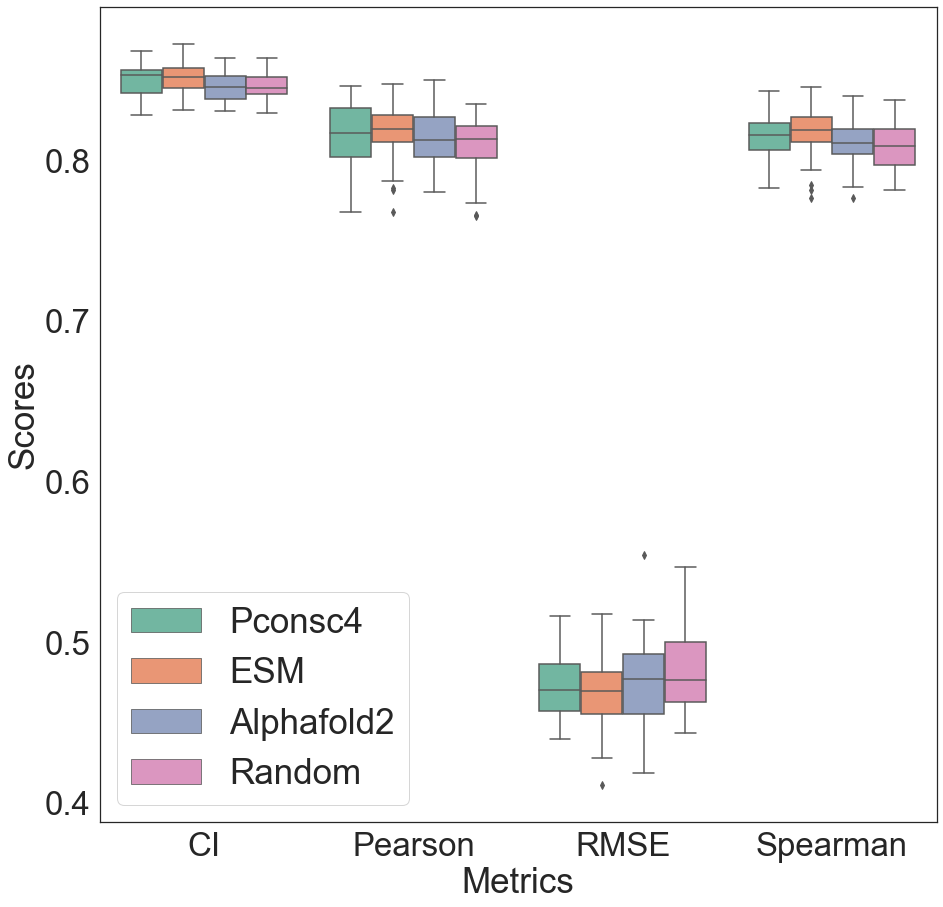

In [13]:
fig = plt.figure(figsize=(15, 15))

adjust_box_widths(fig, 1.2)
hue_order=['Pconsc4','ESM','Alphafold2','Random']
order = ["CI", "Pearson",'RMSE','Spearman']

ax =  sns.boxplot(x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)

ax.set_xlabel('Metrics',fontsize=35)
ax.set_ylabel('Scores',fontsize=35)

plt.legend(loc='lower left',fontsize=35)

# fig.savefig(os.path.join('results_plots',  'boxplot_proteins' + '.png'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_plots',  'boxplot_proteins' + '.pdf'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_plots',  'boxplot_proteins' + '.svg'), dpi=500, bbox_inches='tight')


### Figure 4

In [84]:
sns.set(font_scale = 2.5,style="white")

Text(0.085, 0.5, 'Scores')

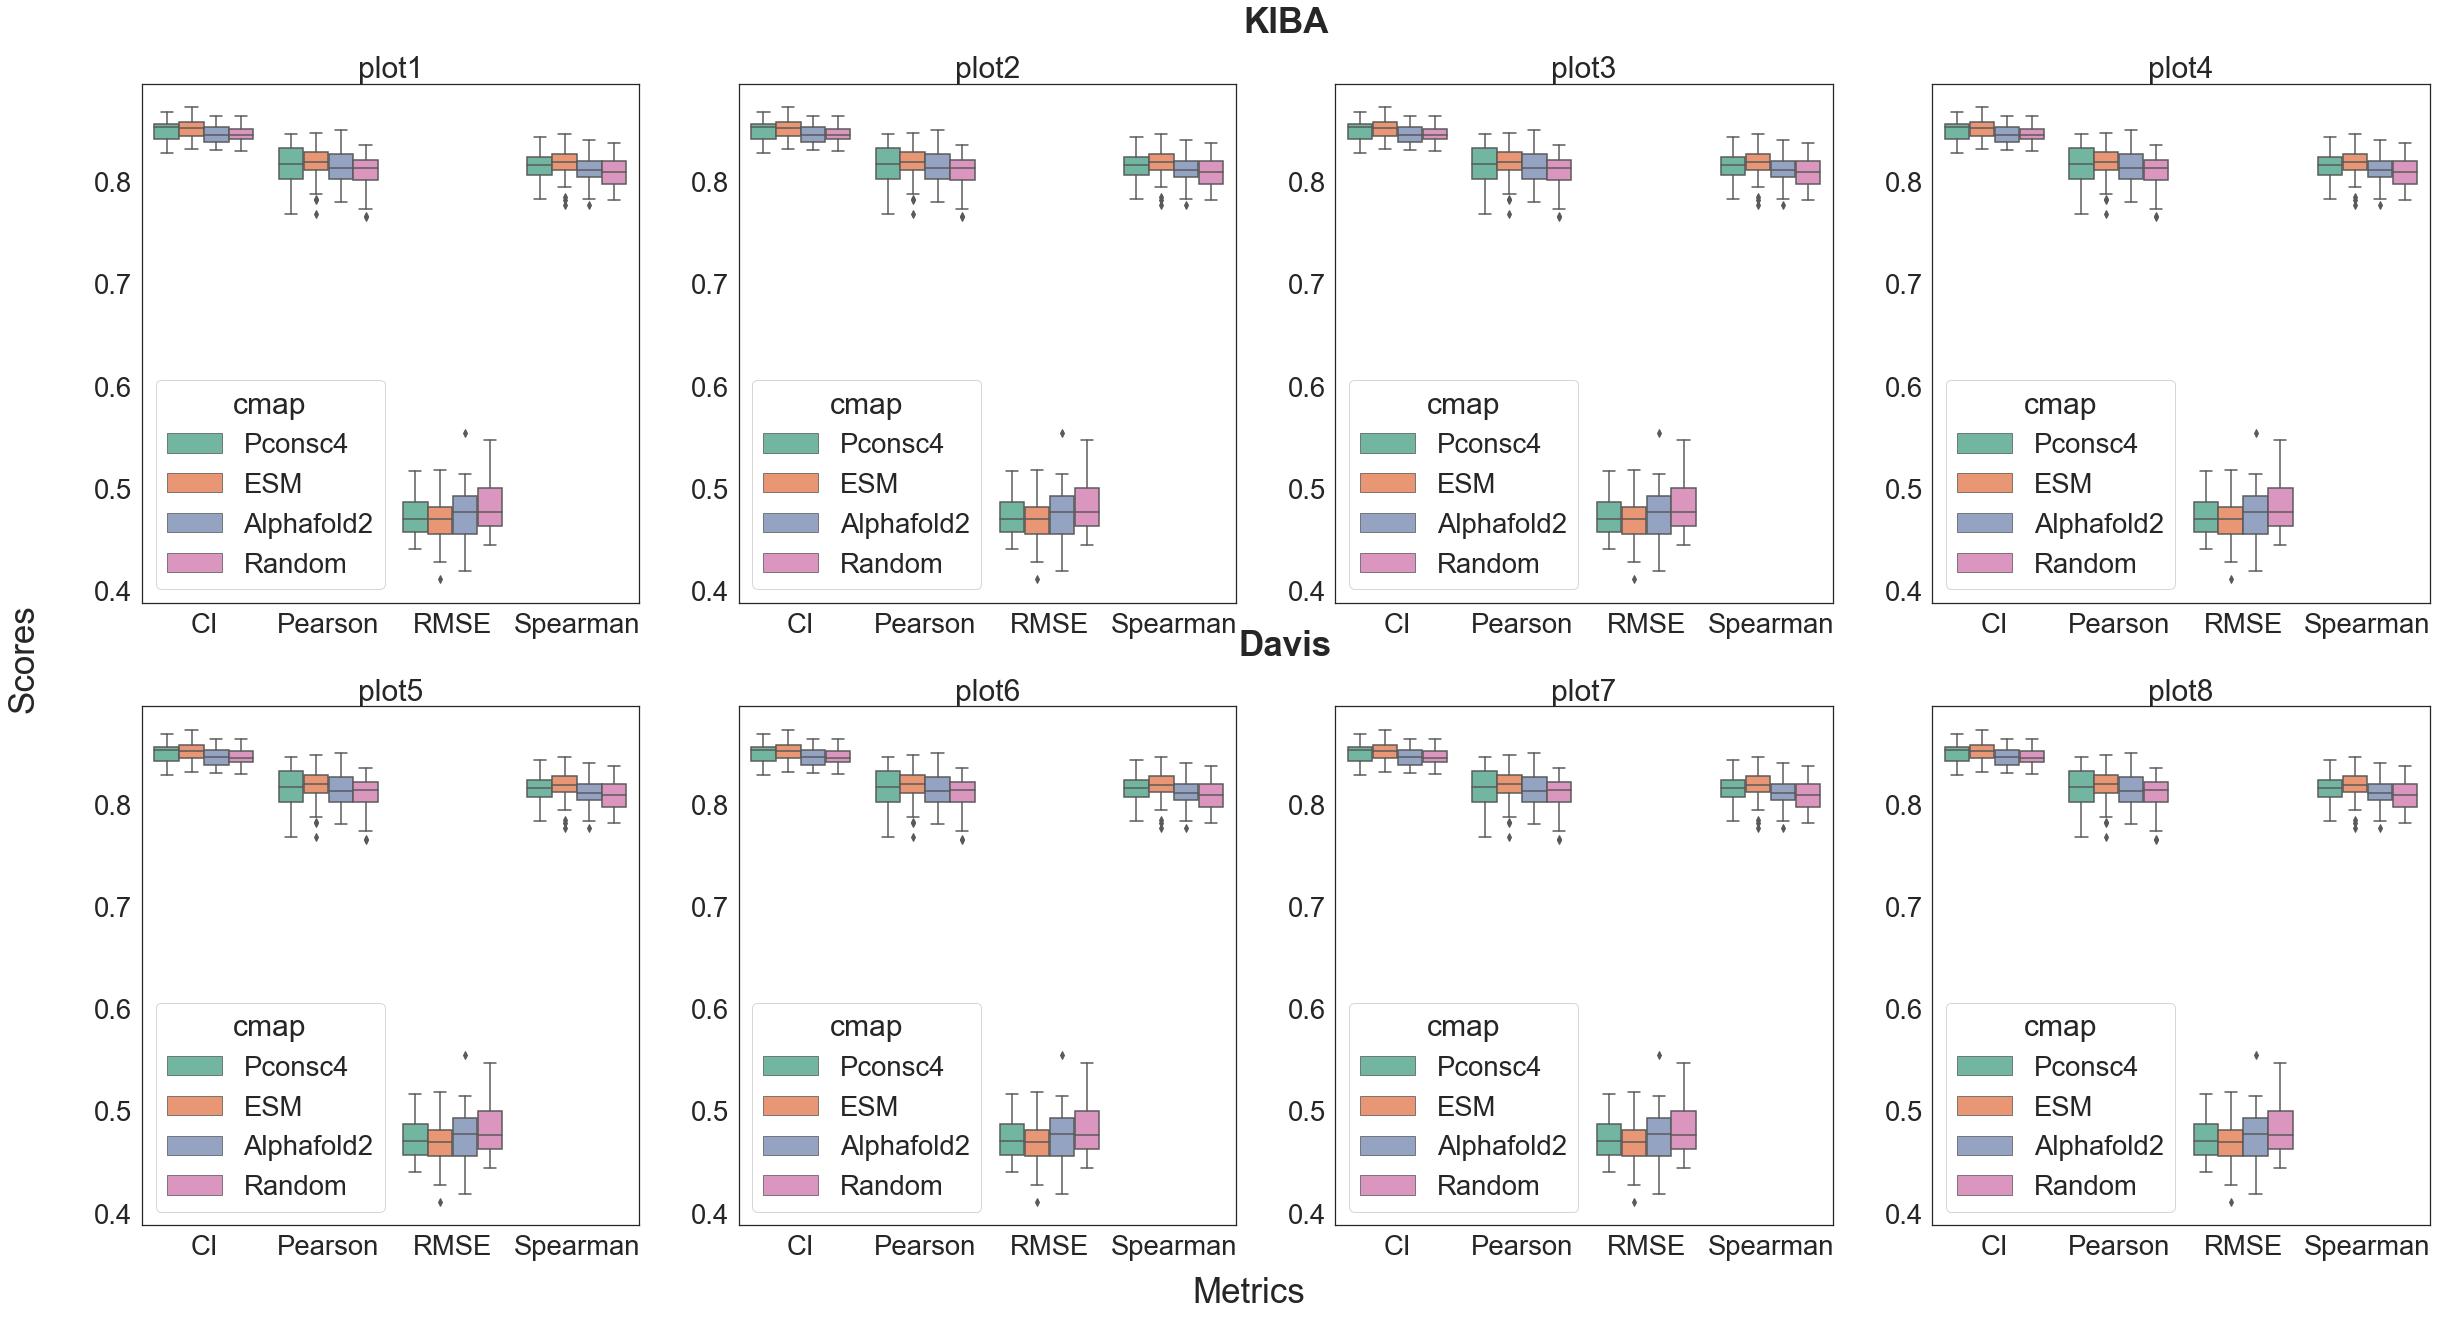

In [121]:
fig, axes = plt.subplots(2, 4, figsize=(41,21))
adjust_box_widths(fig, 1.2)
grid = plt.GridSpec(2, 4)
hue_order=['Pconsc4','ESM','Alphafold2','Random']

order = ["CI", "Pearson",'RMSE','Spearman']
#fig.suptitle('Initial')


create_subtitle(fig, grid[0, ::], 'KIBA')
sns.boxplot(ax=axes[0][0],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axes[0][0].set_title("plot1")
# axes[0][0].set_xlabel('Metrics',fontsize=35)
# axes[0][0].set_ylabel('Scores',fontsize=35)
axes[0][0].set_xlabel('',fontsize=35)
axes[0][0].set_ylabel('',fontsize=35)
#axes[0].set_axis('equal')

sns.boxplot(ax=axes[0][1],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axes[0][1].set_title("plot2")
axes[0][1].set_xlabel('',fontsize=35)
axes[0][1].set_ylabel('',fontsize=35)

sns.boxplot(ax=axes[0][2],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axes[0][2].set_title("plot3")
axes[0][2].set_xlabel('',fontsize=35)
axes[0][2].set_ylabel('',fontsize=35)

sns.boxplot(ax=axes[0][3],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axes[0][3].set_title("plot4")
axes[0][3].set_xlabel('',fontsize=35)
axes[0][3].set_ylabel('',fontsize=35)
create_subtitle(fig, grid[1, ::], 'Davis')
sns.boxplot(ax=axes[1][0],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axes[1][0].set_title("plot5")
axes[1][0].set_xlabel('',fontsize=35)
axes[1][0].set_ylabel('',fontsize=35)
#axes[0].set_axis('equal')

sns.boxplot(ax=axes[1][1],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axes[1][1].set_title("plot6")
axes[1][1].set_xlabel('',fontsize=35)
axes[1][1].set_ylabel('',fontsize=35)

sns.boxplot(ax=axes[1][2],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axes[1][2].set_title("plot7")
axes[1][2].set_xlabel('',fontsize=35)
axes[1][2].set_ylabel('',fontsize=35)
sns.boxplot(ax=axes[1][3],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axes[1][3].set_title("plot8")
axes[1][3].set_xlabel('',fontsize=35)
axes[1][3].set_ylabel('',fontsize=35)

# fig.tight_layout(h_pad=1)
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
#                     hspace=0.4)

fig.supxlabel('Metrics',fontsize=35,y=0.08,ha='center',va='center')
fig.supylabel('Scores',fontsize=35,x=0.085,ha='center',va='center')

# fig.supxlabel('u Velocity (m/s)')
# fig.supylabel('y Distance (cm)')



In [113]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='bold',fontsize=35,ha='center',va='bottom')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')



In [57]:
fig = plt.figure(constrained_layout=True)
#fig.suptitle('Figure title')

# create 2x1 subfigs

cols = ['Column {}'.format(col) for col in range(1, 4)]
rows = ['Row {}'.format(row) for row in ['A', 'B', 'C', 'D']]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')


subfigs = fig.subfigures(nrows=2, ncols=1)
subfigs.title('random')
axs = subfigs.subplots(nrows=1, ncols=4)
sns.boxplot(ax=axs[0],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axs[0].set_title("plot1")
#axes[0].set_axis('equal')
sns.boxplot(ax=axs[1],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axs[1].set_title("plot1")

sns.boxplot(ax=axs[1],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axs[1].set_title("plot1")
sns.boxplot(ax=axs[1],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axs[1].set_title("plot1")


# for row, subfig in enumerate(subfigs):
#     subfig.suptitle(f'Subfigure title {row}')

#     # create 1x4 subplots per subfig
#     axs = subfig.subplots(nrows=1, ncols=4)
#     for col, ax in enumerate(axs):
#         ax.plot()
#         ax.set_title(f'Plot title {col}')

AttributeError: 'numpy.ndarray' object has no attribute 'title'

<Figure size 432x288 with 0 Axes>

TypeError: 'AxesSubplot' object is not subscriptable

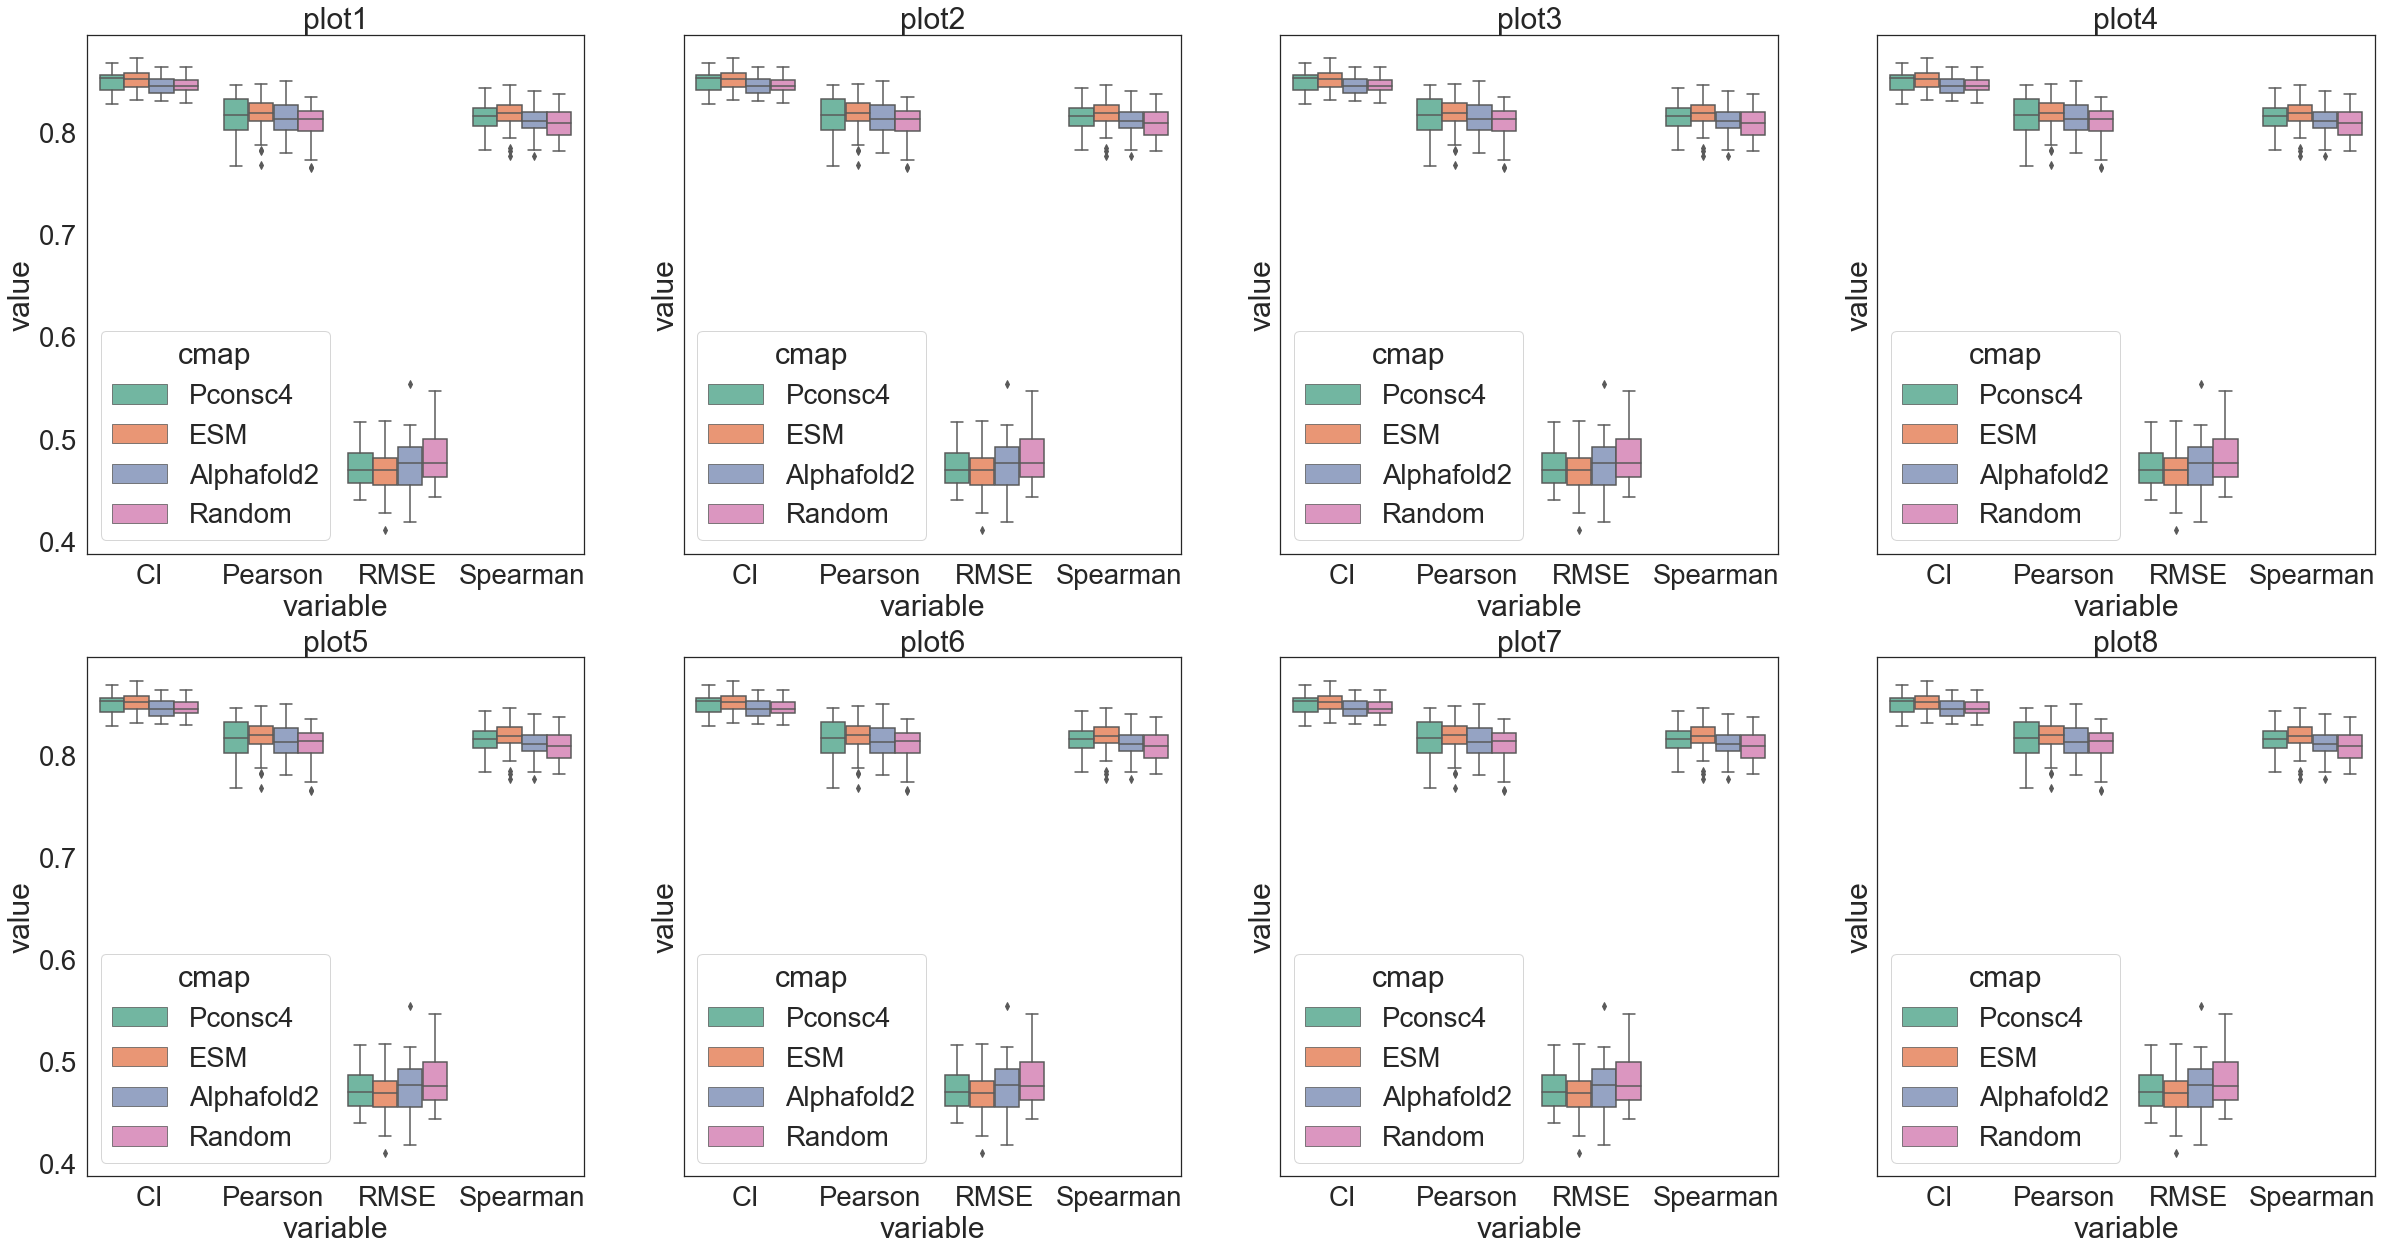

In [53]:
fig, axes = plt.subplots(2, 4, figsize=(41,21), sharey=True)
hue_order=['Pconsc4','ESM','Alphafold2','Random']
order = ["CI", "Pearson",'RMSE','Spearman']
#fig.suptitle('Initial')


sns.boxplot(ax=axes[0][0],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axes[0][0].set_title("plot1")
#axes[0].set_axis('equal')

sns.boxplot(ax=axes[0][1],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axes[0][1].set_title("plot2")

sns.boxplot(ax=axes[0][2],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axes[0][2].set_title("plot3")

sns.boxplot(ax=axes[0][3],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axes[0][3].set_title("plot4")

sns.boxplot(ax=axes[1][0],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axes[1][0].set_title("plot5")
#axes[0].set_axis('equal')

sns.boxplot(ax=axes[1][1],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axes[1][1].set_title("plot6")

sns.boxplot(ax=axes[1][2],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axes[1][2].set_title("plot7")

sns.boxplot(ax=axes[1][3],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axes[1][3].set_title("plot8")



# fig.supxlabel('u Velocity (m/s)')
# fig.supylabel('y Distance (cm)')

fig.axes[0][0].set_ylabel('Davis', rotation = 0, weight = 'bold')
fig.axes[1][0].set_ylabel('KIBA', rotation = 0, weight = 'bold')
    

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

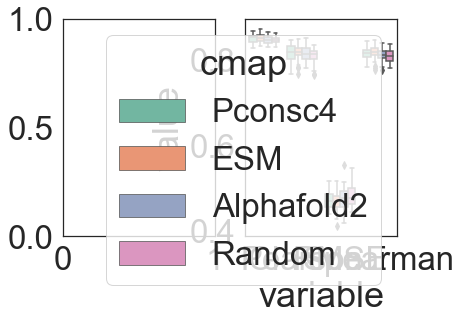

In [17]:
fig, axs = plt.subplots(1, 2)

hue_order=['Pconsc4','ESM','Alphafold2','Random']
order = ["CI", "Pearson",'RMSE','Spearman']
#adjust_box_widths(fig, 1.2)
axs[0, 0]=  sns.boxplot(x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axs[0, 0].set_xlabel('Metrics',fontsize=10)
axs[0, 0].set_ylabel('Scores',fontsize=10)
axs[0, 0].set_title("main")

axs[1, 0]=  sns.boxplot(x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axs[1, 0].set_xlabel('Metrics',fontsize=10)
axs[1, 0].set_ylabel('Scores',fontsize=10)
axs[1, 0].set_title("main1")

axs[0, 1]=  sns.boxplot(x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
axs[0, 1].set_xlabel('Metrics',fontsize=10)
axs[0, 1].set_ylabel('Scores',fontsize=10)
axs[0, 1].set_title("main2")


# axs[1, 1]=  sns.boxplot(x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order)
# axs[1, 1].set_xlabel('Metrics',fontsize=35)
# axs[1, 1].set_ylabel('Scores',fontsize=35)
# axs[1, 1].set_title("main4")
#plt.legend(loc='lower left',fontsize=35)
fig.tight_layout()

In [ ]:
# Make figures A4 in size
A = 4
plt.rc('figure', figsize=[33.11 * .5**(.5 * A), 46.82 * .5**(.5 * A)])
# Use Latex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Call function
fig, axes = plt.subplots(3, 2)
fig.subplots_adjust(
    left=0.1, right=0.98, top=0.97, bottom=0.03, wspace=0.3, hspace=0.3
)
for i, ax in enumerate(axes.flat):
    plot_boxplots(datasets[i], colours, groups[i], ax, title[i])

plt.show()